# EDA: Exploratory Data Analysis

## Analisis inicial:

1.- Carga de los datos

2.- Inspeccion inicial: calidad de datos pre EDA -> info(), isnull(), duplicated(), describe(), dtypes como algunos ejemplos.

3.- Identificacion de los problemas

### 1.- Carga de los datos

In [ ]:
import kagglehub
import pandas as pd
import os

# Descargar y cargar el dataset
path = kagglehub.dataset_download("gregorut/videogamesales")
df = pd.read_csv(os.path.join(path, 'vgsales.csv'))

### 2.- Inspeccion inicial

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


## EDA: Tecnicas claves

1.- Analisis Univariado: histogramas, boxplots, media, mediana y moda

2.- Analisis Bivariado: scatter plots, correlacion de Pearson y crosstab

3.- Analisis Multivariado: matrices de correlacion, pair plots y regresion multiple

4.- Visualizaciones: histogramas, dispersion, barras, mapas de calor

### Analisis univariado

In [ ]:
print('Media: ', df['NA_Sales'].mean())
print('Mediana: ', df['NA_Sales'].median())
print('Desviacion estandar: ', df['NA_Sales'].std())
print('Moda: ',df['NA_Sales'].mode())

Media:  0.26466742981082064
Mediana:  0.08
Desviacion estandar:  0.8166830292990428
Moda:  0    0.0
Name: NA_Sales, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

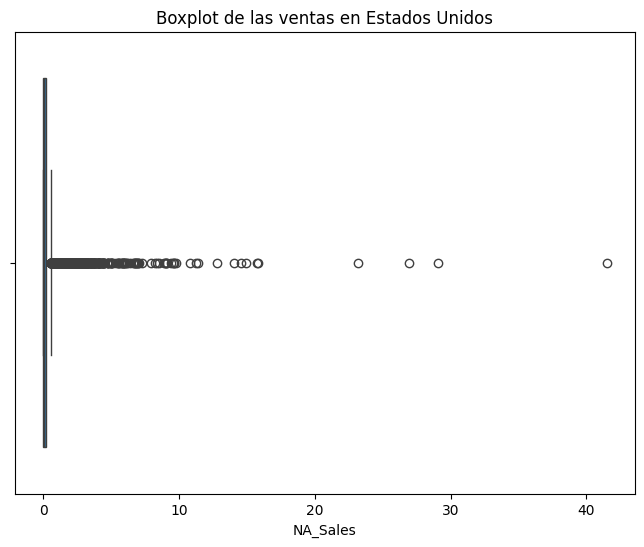

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['NA_Sales'])
plt.title('Boxplot de las ventas en Estados Unidos')
plt.show()

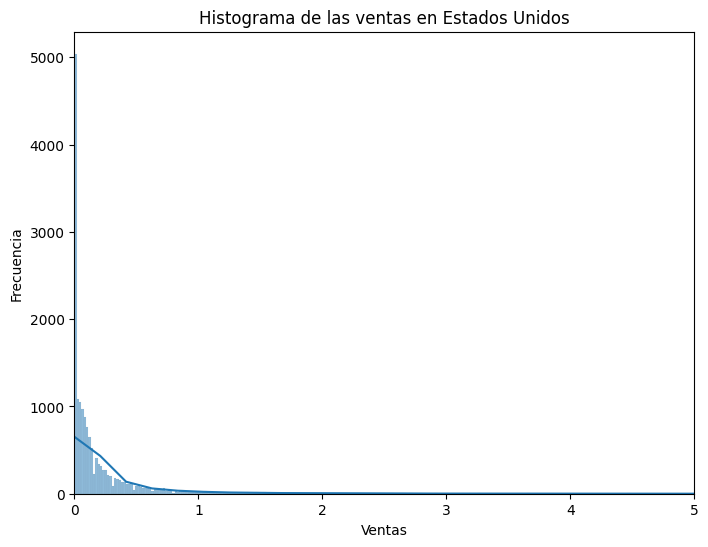

In [ ]:
plt.figure(figsize = (8, 6))
sns.histplot(x = df['NA_Sales'], bins = 'auto', kde = True)
plt.title('Histograma de las ventas en Estados Unidos')
plt.xlim(0, 5)
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

#### Ejercicio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {'ID': range(1, 1000),
      'Producto': np.random.choice(['Camiseta', 'Pantalon', 'Zapatos', 'Gorra', 'Calcetines'], 999),
      'Precio': np.round(np.random.uniform(10, 100, 999), 2),
      'Ventas': np.random.randint(1, 80, 999),
      'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], 999),
      'Descuento': np.random.choice([True, False], 999),
      'Clasificacion_cliente': np.random.randint(1, 6, 999)}
df = pd.DataFrame(data)
df

,ID,Producto,Precio,Ventas,Region,Descuento,Clasificacion_cliente
0,1,Gorra,82.66,52,Norte,True,5
1,2,Zapatos,74.42,78,Oeste,True,1
2,3,Zapatos,20.37,78,Norte,True,3
3,4,Gorra,12.68,18,Oeste,True,4
4,5,Pantalon,27.97,44,Este,False,1
...,...,...,...,...,...,...,...
994,995,Pantalon,11.82,33,Sur,True,3
995,996,Pantalon,17.33,25,Este,False,3
996,997,Gorra,15.06,42,Norte,False,1
997,998,Pantalon,51.43,42,Norte,False,3


In [ ]:
df.loc[3, 'Precio'] = np.nan
df.loc[10, 'Ventas'] = np.nan
df.loc[15, 'Region'] = np.nan
df.head(5)

,ID,Producto,Precio,Ventas,Region,Descuento,Clasificacion_cliente
0,1,Zapatos,17.85,18.0,Sur,False,5
1,2,Pantalon,30.17,45.0,Norte,False,5
2,3,Camiseta,19.51,13.0,Sur,False,4
3,4,Calcetines,NaN,20.0,Norte,True,3
4,5,Gorra,56.65,28.0,Oeste,False,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20 non-null     int64  
 1   Producto               20 non-null     object 
 2   Precio                 19 non-null     float64
 3   Ventas                 19 non-null     float64
 4   Region                 19 non-null     object 
 5   Descuento              20 non-null     bool   
 6   Clasificacion_cliente  20 non-null     int64  
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 1.1+ KB


In [ ]:
df.describe()

,ID,Precio,Ventas,Clasificacion_cliente
count,20.00000,19.000000,19.000000,20.000000
mean,10.50000,48.848421,26.210526,2.450000
std,5.91608,25.078903,14.558613,1.394538
min,1.00000,15.120000,2.000000,1.000000
25%,5.75000,23.800000,12.000000,1.000000
50%,10.50000,54.920000,31.000000,2.000000
75%,15.25000,67.035000,39.500000,3.250000
max,20.00000,95.350000,42.000000,5.000000


In [ ]:
temp = df.drop(columns = ['ID'])
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Precio,19.0,48.848421,25.078903,15.12,23.8,54.92,67.035,95.35
Ventas,19.0,26.210526,14.558613,2.00,12.0,31.00,39.500,42.00
Clasificacion_cliente,20.0,2.450000,1.394538,1.00,1.0,2.00,3.250,5.00


In [ ]:
df.isnull().sum()

,0
ID,0
Producto,0
Precio,1
Ventas,1
Region,1
Descuento,0
Clasificacion_cliente,0


In [ ]:
df2 = df.dropna()
df2

,ID,Producto,Precio,Ventas,Region,Descuento,Clasificacion_cliente
0,1,Camiseta,15.43,36.0,Este,True,2
1,2,Calcetines,71.86,23.0,Sur,True,5
2,3,Zapatos,77.95,28.0,Oeste,False,3
4,5,Gorra,79.59,8.0,Sur,True,2
5,6,Gorra,58.64,40.0,Oeste,False,3
6,7,Calcetines,23.14,42.0,Este,False,4
7,8,Camiseta,95.35,39.0,Este,False,2
8,9,Calcetines,68.54,7.0,Norte,False,1
9,10,Zapatos,15.12,31.0,Sur,False,1
11,12,Gorra,22.75,25.0,Oeste,False,3


In [ ]:
df['Precio'].median()

54.92

In [ ]:
df['Precio'].fillna(df['Precio'].mean())
df['Ventas'].fillna(df['Ventas'].mean())
df['Region'].fillna(df['Region'].mode)

,Region
0,Sur
1,Sur
2,Sur
3,Norte
4,Norte
5,Oeste
6,Sur
7,Norte
8,Norte
9,Oeste


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20 non-null     int64  
 1   Producto               20 non-null     object 
 2   Precio                 20 non-null     float64
 3   Ventas                 20 non-null     int64  
 4   Region                 20 non-null     object 
 5   Descuento              20 non-null     bool   
 6   Clasificacion_cliente  20 non-null     int64  
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 1.1+ KB


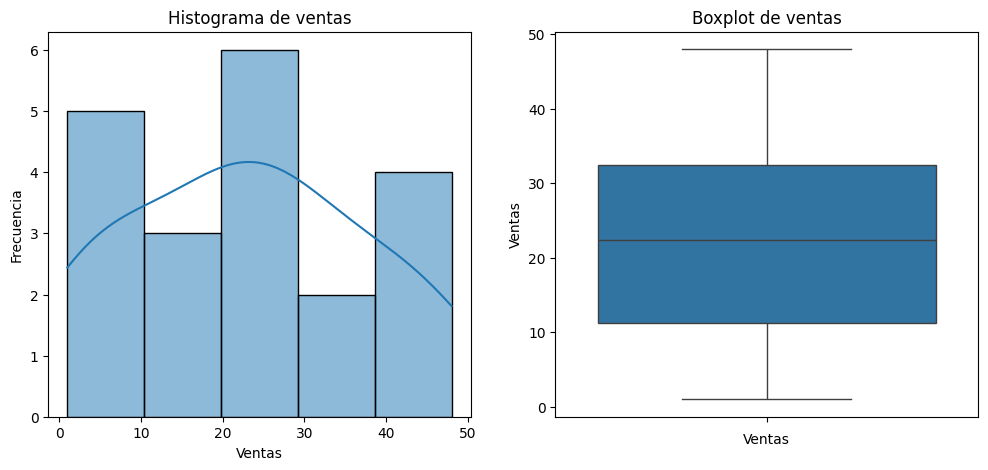

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Ventas'], bins = 5, kde = True)
plt.title('Histograma de ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.boxplot(y = df['Ventas'])
plt.title('Boxplot de ventas')
plt.xlabel('Ventas')
plt.show()

In [ ]:
df_num = df.select_dtypes(include = np.number)
corr = df_num.corr()
corr

,ID,Precio,Ventas,Clasificacion_cliente
ID,1.000000,0.481656,-0.194082,-0.319621
Precio,0.481656,1.000000,0.332994,-0.252611
Ventas,-0.194082,0.332994,1.000000,-0.126573
Clasificacion_cliente,-0.319621,-0.252611,-0.126573,1.000000


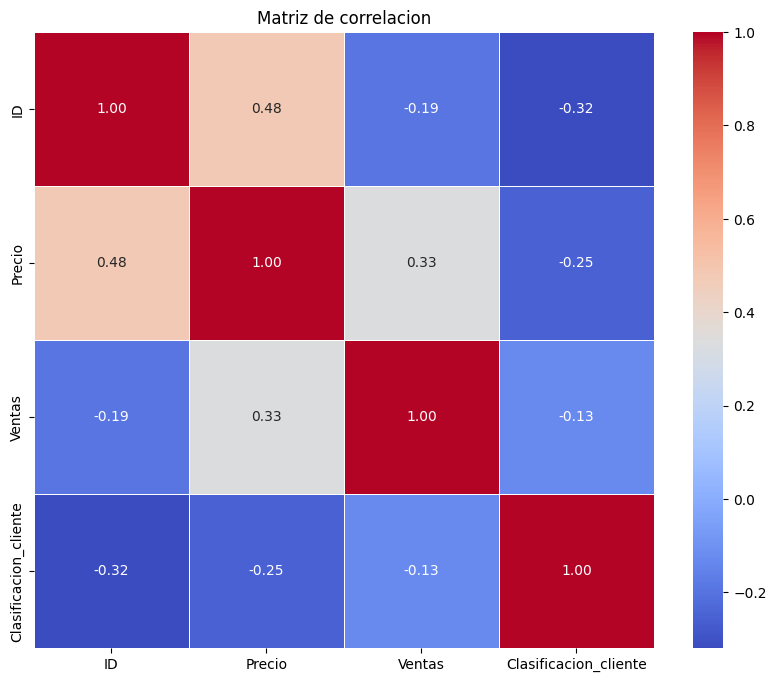

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = .5)
plt.title('Matriz de correlacion')
plt.show()

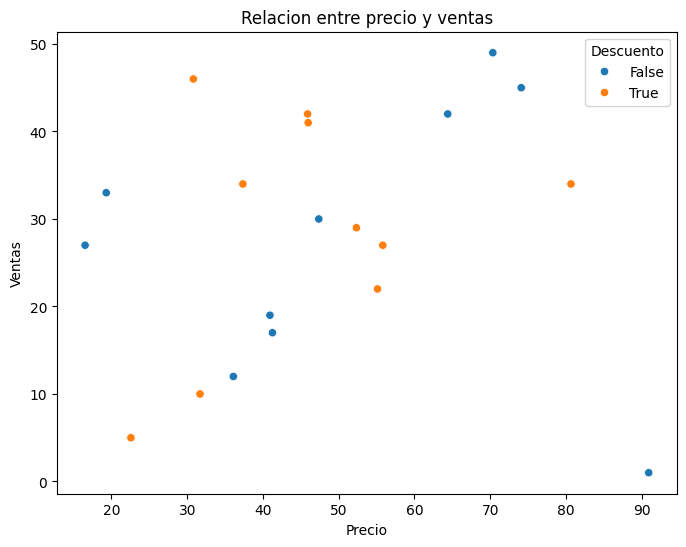

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['Precio'], y = df['Ventas'], data = df, hue = 'Descuento')
plt.title('Relacion entre precio y ventas')
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.show()

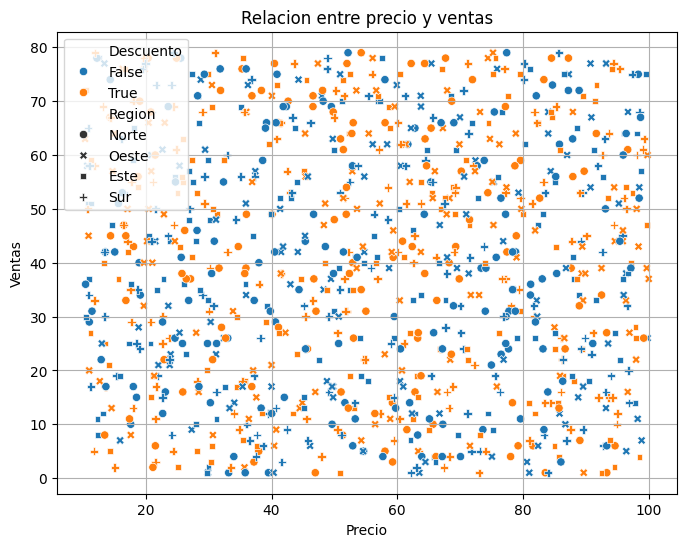

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['Precio'], y = df['Ventas'], data = df, hue = 'Descuento', style = 'Region')
plt.title('Relacion entre precio y ventas')
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

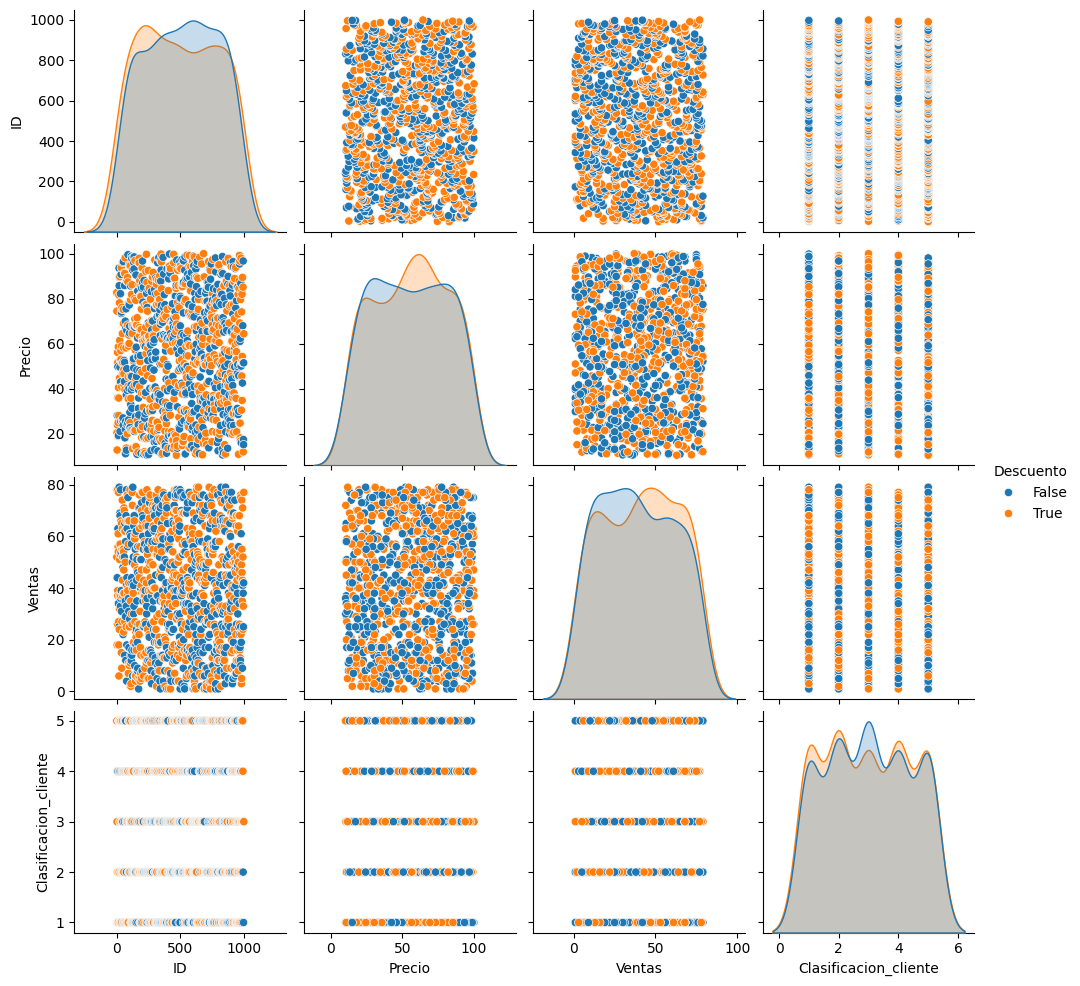

In [ ]:
plt.figure(figsize = (8, 6))
sns.pairplot(df, hue = 'Descuento')
plt.show()

### Analisis Estadistico

#### Medidas estadisticas

In [ ]:
import statistics as stats

datos = [1, 1, 1, 2, 3, 4, 4, 5, 5, 5, 5]
print('Media: ', stats.mean(datos))
print('Mediana: ', stats.median(datos))
print('Moda: ', stats.mode(datos))

Media:  3.272727272727273
Mediana:  4
Moda:  5


#### Medidas de dispersion

In [ ]:
import numpy as np

datos = [10, 12, 15, 13, 11]

varianza_pobla = np.var(datos)
print('La varianza es: ', varianza_pobla)

varianza_muestra = np.var(datos, ddof = 1) #con correcion de Bessel -> por el ddof
print('La varianza muestra es: ', varianza_muestra)

desv_pobla = np.std(datos)
print('La desviacion estandar es: ', desv_pobla)

desv_muestra = np.std(datos, ddof = 1)
print('La desviacion estandar muestra es: ', desv_muestra)

La varianza es:  2.96
La varianza muestra es:  3.7
La desviacion estandar es:  1.7204650534085253
La desviacion estandar muestra es:  1.9235384061671346


In [ ]:
poblacion = np.array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
muestra = np.random.choice(poblacion, size = 5, replace = False)
print('Poblacion: ', poblacion)
print('Muestra: ', muestra)

Poblacion:  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Muestra:  [19 21 20 18 25]


#### Percentiles

In [ ]:
datos = np.array([10, 12, 15, 18, 20, 22, 25, 28, 30, 32])

print('Quartiles: \n')
q1 = np.quantile(datos, 0.25)
q2 = np.quantile(datos, 0.5)
q3 = np.quantile(datos, 0.75)
print('Primer cuartil: ', q1)
print('Segundo cuartil: ', q2)
print('Tercer cuartil: ', q3)

print('\nQuintil: \n')
q5 = np.quantile(datos, 0.20)
print(q5)

print('\nDecil 7: \n')
q7 = np.quantile(datos, 0.70)
print(q7)

print('\nPercentil 99: \n')
q99 = np.quantile(datos, 0.99)
print(q99)


Quartiles: 

Primer cuartil:  15.75
Segundo cuartil:  21.0
Tercer cuartil:  27.25

Quintil: 

14.4

Decil 7: 

25.9

Percentil 99: 

31.82


#### Ejercicio

##### 1. Importar librerias

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Crear el dataset

In [ ]:
edades = np.array([18, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 24, 24, 25, 26, 27, 80])
df = pd.DataFrame(edades, columns = ['Edad'])
df.head()

,Edad
0,18
1,19
2,19
3,20
4,20


##### 3. Tabla de frecuencia

In [ ]:
tabla_frecuencia = df['Edad'].value_counts().sort_index().to_frame('Frecuencia absoluta')
tabla_frecuencia['Frecuencia relativa'] = tabla_frecuencia['Frecuencia absoluta'] / tabla_frecuencia['Frecuencia absoluta'].sum()
tabla_frecuencia['Frecuencia acumulada'] = tabla_frecuencia['Frecuencia absoluta'].cumsum()
tabla_frecuencia['Frecuencia relativa acumulada'] = tabla_frecuencia['Frecuencia relativa'].cumsum()
tabla_frecuencia

,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada,Frecuencia relativa acumulada
Edad,,,,
18,1,0.05,1,0.05
19,2,0.10,3,0.15
20,3,0.15,6,0.30
21,3,0.15,9,0.45
22,3,0.15,12,0.60
23,2,0.10,14,0.70
24,2,0.10,16,0.80
25,1,0.05,17,0.85
26,1,0.05,18,0.90


##### 4. Medidas estadisticas

In [ ]:
print('Media: ', df['Edad'].mean())
print('Mediana: ', df['Edad'].median())
print('Moda: ', df['Edad'].mode())

Media:  24.85
Mediana:  22.0
Moda:  0    20
1    21
2    22
Name: Edad, dtype: int64


##### 5. Medidas de dispersion

In [ ]:
rango = df['Edad'].max() - df['Edad'].min()
print('Rango de la edad: ',rango)
var_muestra = df['Edad'].var(ddof = 1)
print(f'Varianza de la edad: {var_muestra:.2f}')
desv_muestra = df['Edad'].std(ddof = 1)
print(f'Desviacion estandar de la edad: {desv_muestra:.2f}')

Rango de la edad:  62
Varianza de la edad: 174.24
Desviacion estandar de la edad: 13.20


##### 6. Percentiles

In [ ]:
q1 = np.percentile(df['Edad'], 25)
q2 = np.percentile(df['Edad'], 50)
q3 = np.percentile(df['Edad'], 75)
print('Primer cuartil: ', q1)
print('Segundo cuartil: ', q2)
print('Tercer cuartil: ', q3)

Primer cuartil:  20.0
Segundo cuartil:  22.0
Tercer cuartil:  24.0


##### 7. Outliers

In [ ]:
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_supp = q3 + 1.5 * iqr
print(f'Limite superior {lim_supp:.2f}')
print(f'Limite inferior {lim_inf:.2f}')
outliers = df[(df['Edad'] < lim_inf) | (df['Edad'] > lim_supp)]
outliers

Limite superior 30.00
Limite inferior 14.00


,Edad
19,80


In [ ]:
df_limpio = df.drop(outliers.index, inplace = True)

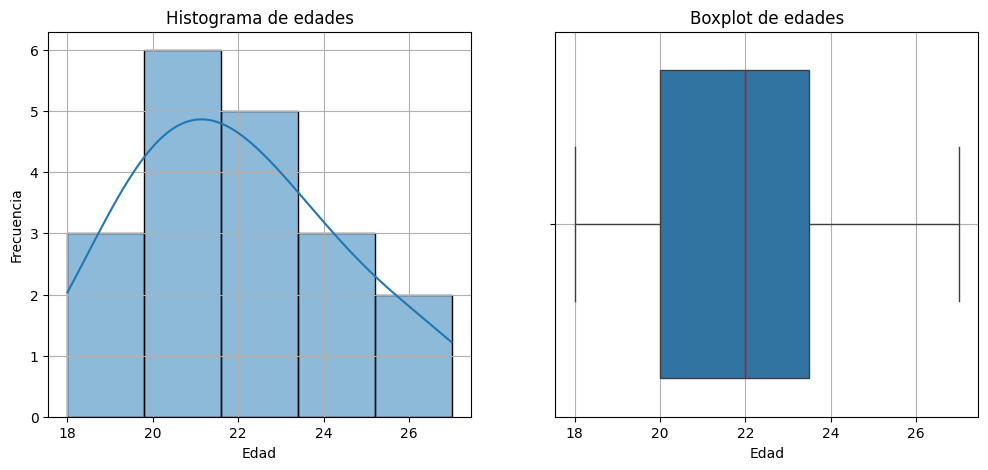

In [ ]:
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)

sns.histplot(x = df['Edad'], bins = 5, edgecolor = 'black', kde = True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Histograma de edades')

plt.subplot(1, 2, 2)

sns.boxplot(x = df['Edad'], patch_artist = True, medianprops = {'color': 'red'})
plt.xlabel('Edad')
plt.grid(True)
plt.title('Boxplot de edades')

plt.show()

## Correlacion

Ejemplo de correlacion: Más horas de estudio implican mejores resultados

In [ ]:
import numpy as np

np.random.seed(777)

horas_estudios = np.random.uniform(1, 10, 20)
#print(horas_estudios)
#print(horas_estudios[0:5])

notas = horas_estudios * 0.8 + np.random.normal(0, 1, 20) #con valores caracterisiticos de una distribucion normal clasica
#notas[0:5]

df = pd.DataFrame({'Horas': horas_estudios, 'Notas': notas})
df.head()

,Horas,Notas
0,2.373974,1.266711
1,3.721209,2.418094
2,1.558328,0.013431
3,5.138743,3.671491
4,8.517280,7.728612


### Tabla de contingencia

In [ ]:
import pandas as pd

genero = np.random.choice(['Hombre', 'Mujer'], 50)
preferencia_cine = np.random.choice(['Si', 'No'], 50, p = [0.6, 0.4]) if 'Mujer' in genero else np.random.choice(['Si', 'No'], 50, p = [0.4, 0.6])

#print(genero)
#print(preferencia_cine)

#Mismo ejercicio otro metodo y otras probabilidades
preferencias = []
for g in genero:
  if g == 'Mujer':
    preferencias.append(np.random.choice(['Si', 'No'], p = [0.7, 0.3])) #no hace falta el 50
  else:
    preferencias.append(np.random.choice(['Si', 'No'], p = [0.4, 0.6]))

df = pd.DataFrame({'Genero': genero, 'Preferencias': preferencias})
df.head()

tabla_contingencia = pd.crosstab(df['Genero'], df['Preferencias'])
tabla_contingencia

mujeres = tabla_contingencia.loc['Mujer'].sum()
hombres = tabla_contingencia.loc['Hombre'].sum()

print(mujeres)
print(hombres)

mujer_si = tabla_contingencia.loc['Mujer', 'Si'].sum()
print(mujer_si)

hombre_no = tabla_contingencia.loc['Hombre', 'No'].sum()
print(hombre_no)

print('Probabilidad mujeres decir que si: ', mujer_si / mujer_si)
print('Probabilidad hombres decir que no: ', hombre_no / hombres)

22
28
16
18
Probabilidad mujeres decir que si:  1.0
Probabilidad hombres decir que no:  0.6428571428571429


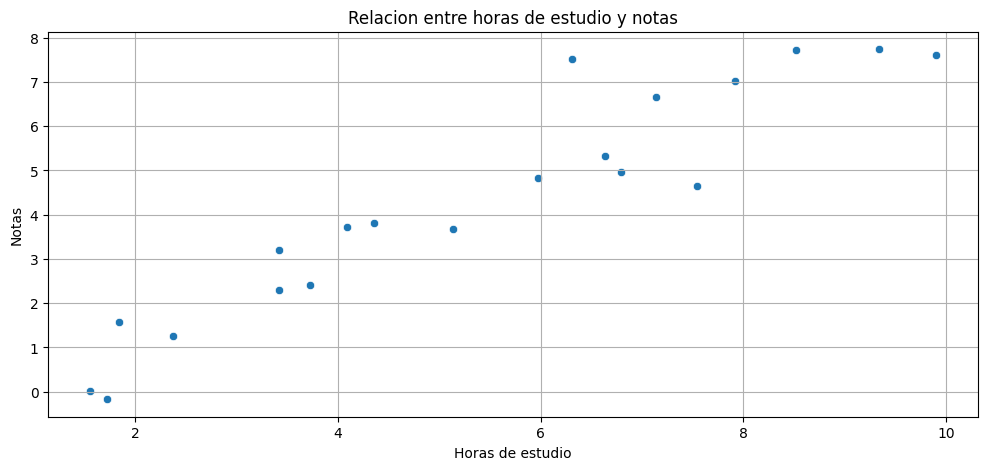

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 5))
sns.scatterplot(x = df['Horas'], y = df['Notas'])
plt.title('Relacion entre horas de estudio y notas')
plt.xlabel('Horas de estudio')
plt.ylabel('Notas')
plt.grid(True)
plt.show()

### Coeficiente de Pearson

In [ ]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Horas'], df['Notas'])
print('Correlacion: ', corr) #que tipo de correlacion tienen las variables y que tan fuerte es
print('P-value: ', p_value) #esta relacion es estadisticamente significativa

if corr >= 0.7 or corr <= -0.7:
  if p_value < 0.05:
    print('Es una correlacion fuerte y estadisticamente significativa')
  else:
    print('Es una correlacion fuerte pero depende del azar')

Correlacion:  0.9420388918461918
P-value:  5.675985430994865e-10
Es una correlacion fuerte y estadisticamente significativa


### Ejercicio

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratyushpuri/global-ai-job-market-trend-2025")

print("Path to dataset files:", path)

100%|██████████| 517k/517k [00:00<00:00, 16.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pratyushpuri/global-ai-job-market-trend-2025/versions/1


In [ ]:
import os
import pandas as pd

os.listdir('/root/.cache/kagglehub/datasets/pratyushpuri/global-ai-job-market-trend-2025/versions/1')
path = '/root/.cache/kagglehub/datasets/pratyushpuri/global-ai-job-market-trend-2025/versions/1/ai_job_dataset.csv'
df = pd.read_csv(path)
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [ ]:
tc_jobt = pd.crosstab(df['job_title'], df['experience_level'])
tc_jobt

experience_level,EN,EX,MI,SE
job_title,,,,
AI Architect,155,196,213,207
AI Consultant,173,169,186,176
AI Product Manager,194,186,184,179
AI Research Scientist,187,201,186,182
AI Software Engineer,198,206,210,170
AI Specialist,164,195,180,189
Autonomous Systems Engineer,191,177,204,205
Computer Vision Engineer,171,160,209,184
Data Analyst,200,164,196,199


In [ ]:
tc_explvl = pd.crosstab(df['experience_level'], df['employment_type'])
tc_explvl

employment_type,CT,FL,FT,PT
experience_level,,,,
EN,912,900,939,967
EX,953,920,963,924
MI,937,1000,924,920
SE,919,938,986,898


In [ ]:
tc_compt = pd.crosstab(df['company_location'], df['remote_ratio'])
tc_compt

remote_ratio,0,50,100
company_location,,,
Australia,238,244,250
Austria,253,246,266
Canada,256,258,255
China,263,229,271
Denmark,255,265,258
Finland,269,244,220
France,256,262,251
Germany,280,289,245
India,244,249,261


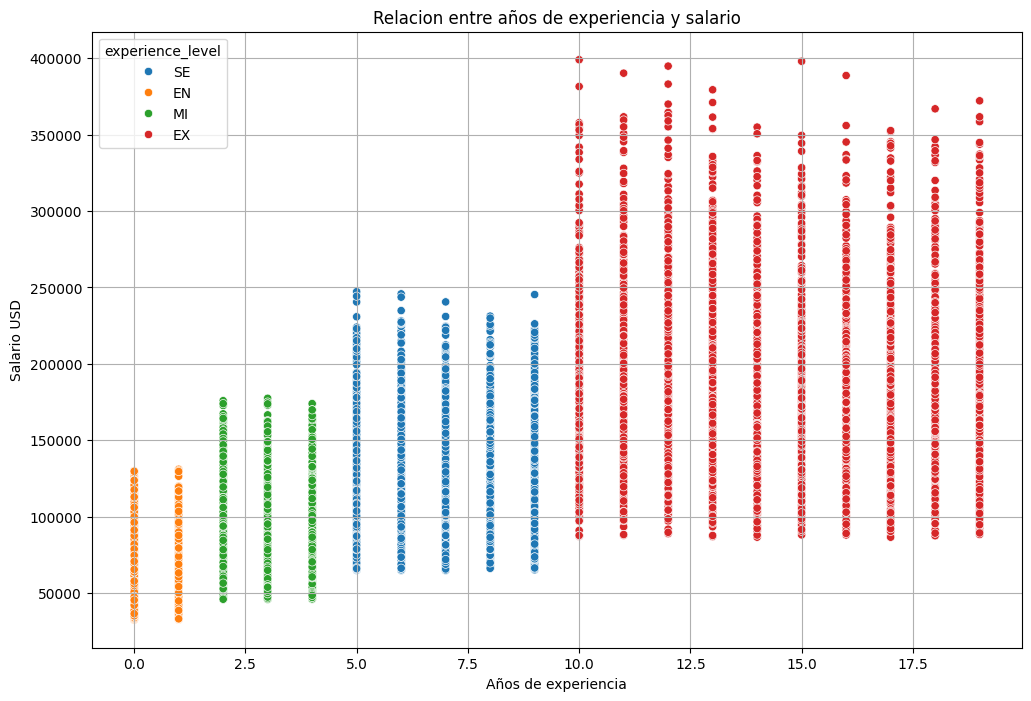

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, x = 'years_experience', y = 'salary_usd', hue = 'experience_level')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario USD')
plt.title('Relacion entre años de experiencia y salario')
plt.grid(True)
plt.show()

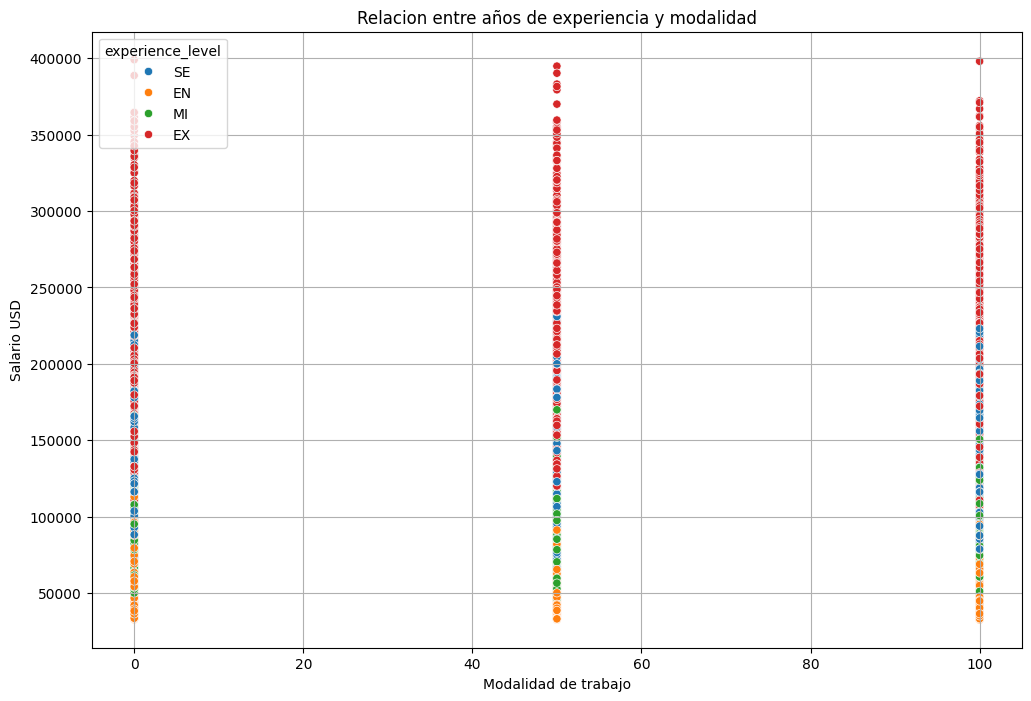

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, x = 'remote_ratio', y = 'salary_usd', hue = 'experience_level')
plt.xlabel('Modalidad de trabajo')
plt.ylabel('Salario USD')
plt.title('Relacion entre años de experiencia y modalidad')
plt.grid(True)
plt.show()

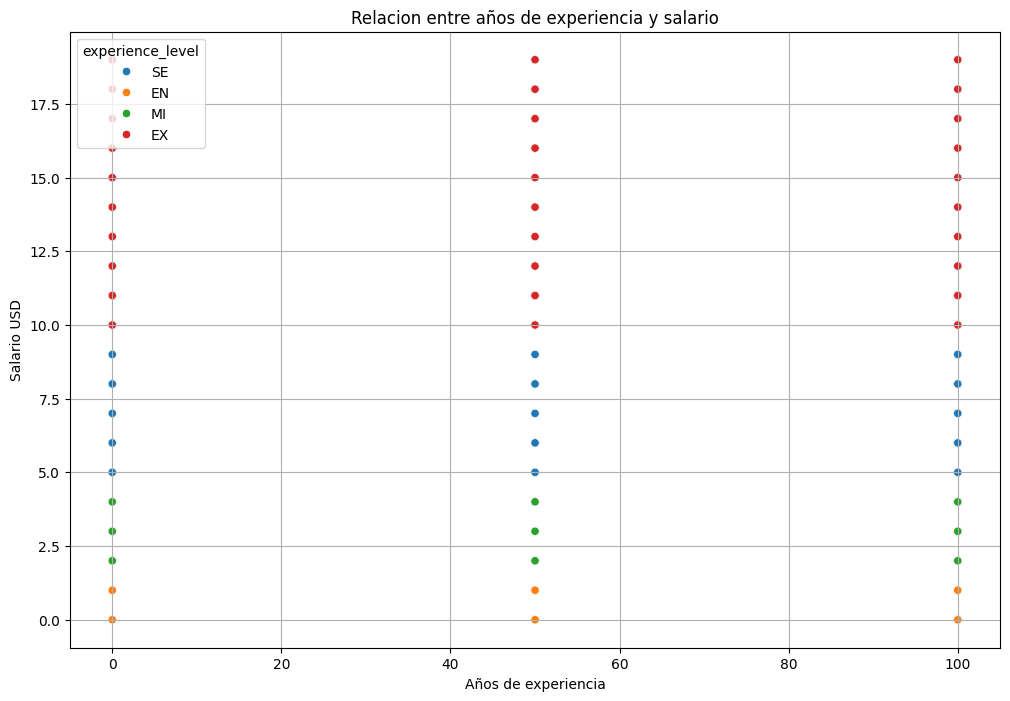

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, x = 'remote_ratio', y = 'years_experience', hue = 'experience_level')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario USD')
plt.title('Relacion entre años de experiencia y salario')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import pearsonr

coef, p_valur = pearsonr(df['salary_usd'], df['years_experience'])
print('Correlacion: ', coef)
print('P-value: ', p_valur)

Correlacion:  0.7375559086856489
P-value:  0.0


In [ ]:
coef, p_valur = pearsonr(df['salary_usd'], df['remote_ratio'])
print('Correlacion: ', coef)
print('P-value: ', p_valur)

Correlacion:  0.013726826032172183
P-value:  0.09273862364557398


## Regresion

Entrenar el modelo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

Obtener los coeficientes

In [ ]:
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print('Beta 0: ', beta_0)
print('Beta 1: ', beta_1)

Beta 0:  2.2
Beta 1:  0.6


Obtener la recta del modelo

In [ ]:
y_pred = modelo.predict(x)

Graficar el resultado

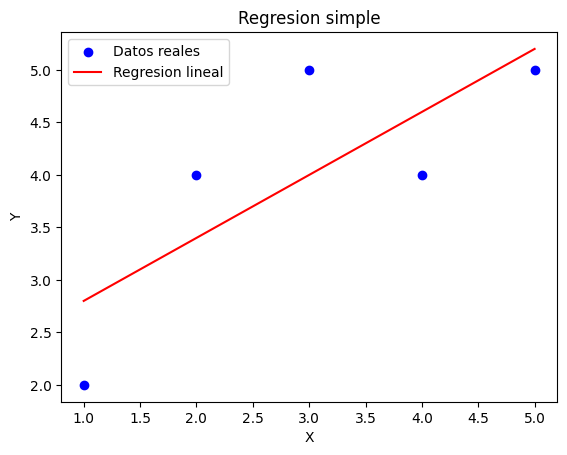

In [ ]:
plt.scatter(x, y, color = 'blue', label = 'Datos reales')
plt.plot(x, y_pred, color = 'red', label = 'Regresion lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresion simple')
plt.legend()
plt.show()

### Ejercicio

[[ 1]
 [ 2]
 [ 4]
 [ 5]
 [ 6]
 [ 8]
 [ 9]
 [10]
 [12]
 [15]]
[ 55  60  65  70  78  80  85  92  95 100]


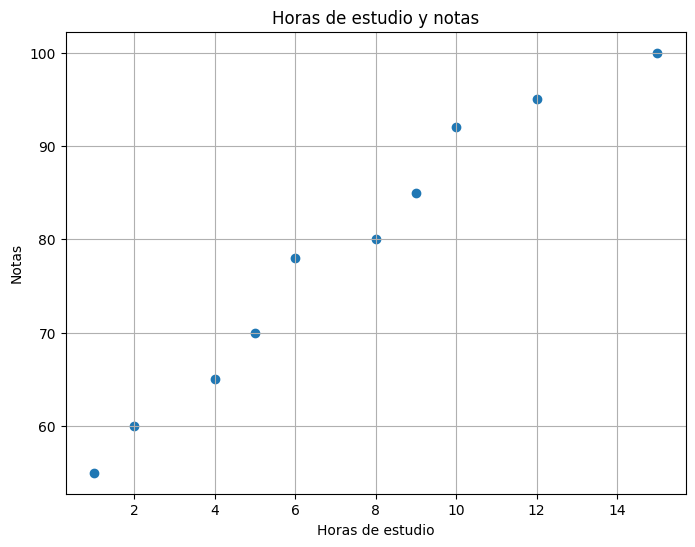

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
horas_estudio = np.array([1, 2, 4, 5, 6, 8, 9, 10, 12, 15]).reshape(-1, 1) #cambiar al estrucuturade datos
notas = np.array([55, 60, 65, 70, 78, 80, 85, 92, 95, 100])

print(horas_estudio)
print(notas)

plt.figure(figsize = (8, 6))
plt.scatter(horas_estudio, notas)
plt.xlabel('Horas de estudio')
plt.ylabel('Notas')
plt.title('Horas de estudio y notas')
plt.grid(True)
plt.show()

In [ ]:
modelo = LinearRegression()
modelo.fit(horas_estudio, notas)

LinearRegression()

In [ ]:
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print(f'Intercepto: {beta_0:.2f}')
print(f'Pendiente: {beta_1:.2f}')

Intercepto: 53.59
Pendiente: 3.39


In [ ]:
y_pred = modelo.predict(horas_estudio)

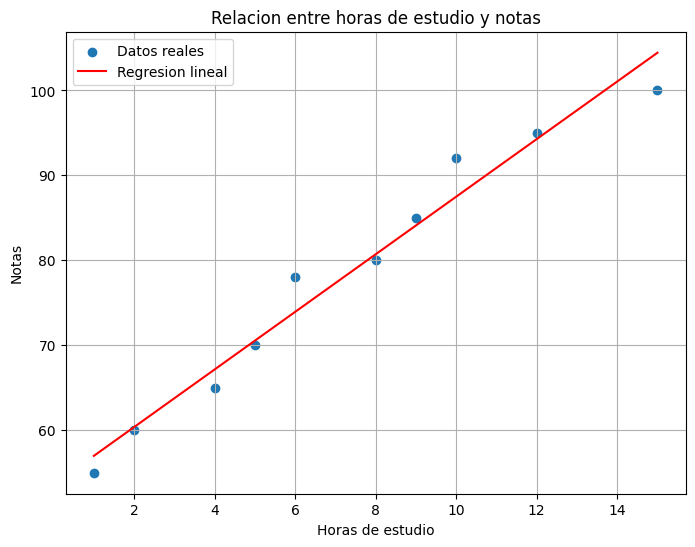

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(horas_estudio, notas, label = 'Datos reales')
plt.plot(horas_estudio, y_pred, color = 'red', label = 'Regresion lineal')
plt.xlabel('Horas de estudio')
plt.ylabel('Notas')
plt.title('Relacion entre horas de estudio y notas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(notas, y_pred)
mae = mean_absolute_error(notas, y_pred)
r2 = r2_score(notas, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MSE: 6.74
MAE: 2.04
R2: 0.97


In [ ]:
import statsmodels.api as sm

x_sm = sm.add_constant(horas_estudio)
print(f'Constante para stats models: {x_sm}')

Constante para stats models: [[ 1.  1.]
 [ 1.  2.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 12.]
 [ 1. 15.]]


In [ ]:
modelo_2 = sm.OLS(notas, x_sm).fit()
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     242.1
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           2.90e-07
Time:                        23:57:05   Log-Likelihood:                -23.732
No. Observations:                  10   AIC:                             51.46
Df Residuals:                       8   BIC:                             52.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5946      1.818     29.487      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
from scipy import stats

residuos = modelo_2.resid
stat, p_value = stats.shapiro(residuos)
print(f'Estadistica de prueba: {stat:.3f}')
print(f'P-value: {p_value:.3f}')

if p_value > 0.05:
  print('Los residuos siguen una distribucion normal, no se rechaza la hipotesis nula.')
else:
  print('Los residuos no siguen una distribucion normal, se rechaza la hipotesis nula.')

Estadistica de prueba: 0.945
P-value: 0.607
Los residuos siguen una distribucion normal, no se rechaza la hipotesis nula.


## Seaborn

### Ejercicio

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(55)

data = {'Edad': np.random.randint(18, 25, 100),
        'Horas de estudio': np.random.randint(5, 30, 100),
        'Calificacion': np.random.normal(75, 10, 100).clip(0, 100), #forzar a que las notas esten entre 0 y 100
        'Genero': np.random.choice(['F', 'M'], 100),
        'Deporte': np.random.choice(['Futbol', 'Baloncesto', 'Natacion', 'Volleybol'], 100)}

df = pd.DataFrame(data)
df.head()

,Edad,Horas de estudio,Calificacion,Genero,Deporte
0,23,26,68.275245,M,Baloncesto
1,20,25,90.638072,F,Volleybol
2,18,8,76.867354,M,Natacion
3,23,12,66.278428,M,Baloncesto
4,23,25,76.292546,F,Volleybol


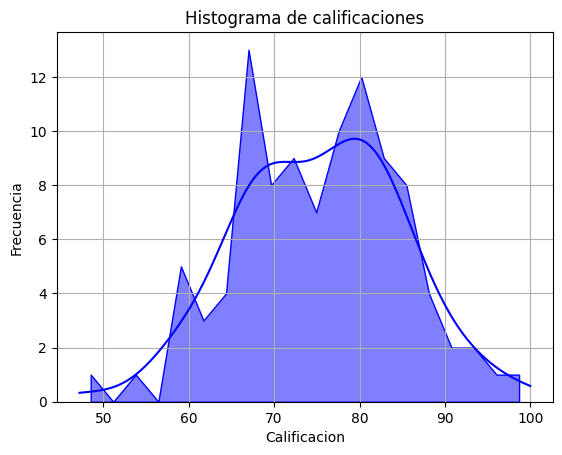

In [ ]:
sns.histplot(data = df, x = 'Calificacion', kde = True, bins = 20, color = 'blue', element = 'poly')
plt.xlabel('Calificacion')
plt.ylabel('Frecuencia')
plt.title('Histograma de calificaciones')
plt.grid(True)
plt.show()

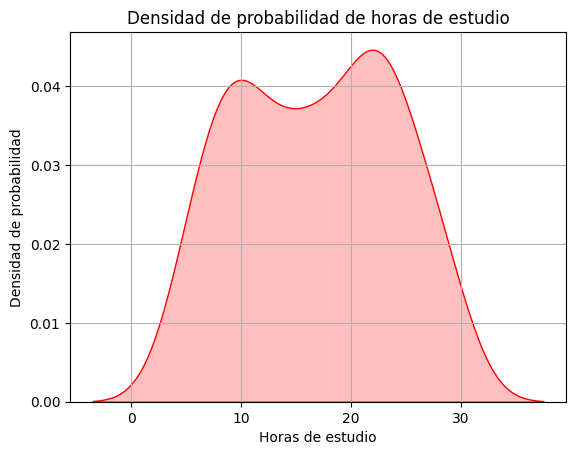

In [ ]:
sns.kdeplot(data = df, x = 'Horas de estudio', fill = True, color = 'red')
plt.xlabel('Horas de estudio')
plt.ylabel('Densidad de probabilidad')
plt.title('Densidad de probabilidad de horas de estudio')
plt.grid(True)
plt.show()

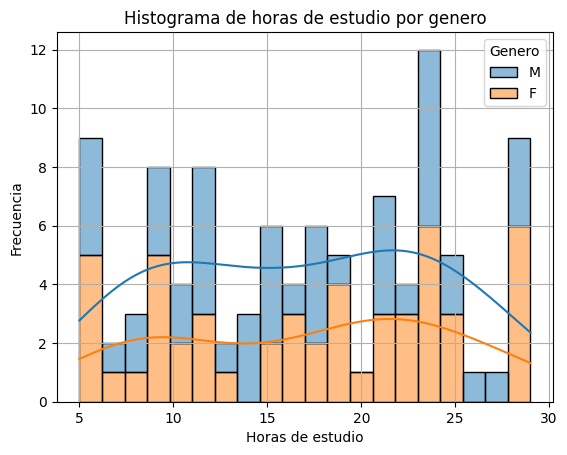

In [ ]:
sns.histplot(data = df, x = 'Horas de estudio', hue = 'Genero', kde = True, bins = 20, multiple = 'stack')
plt.xlabel('Horas de estudio')
plt.ylabel('Frecuencia')
plt.title('Histograma de horas de estudio por genero')
plt.grid(True)
plt.show()

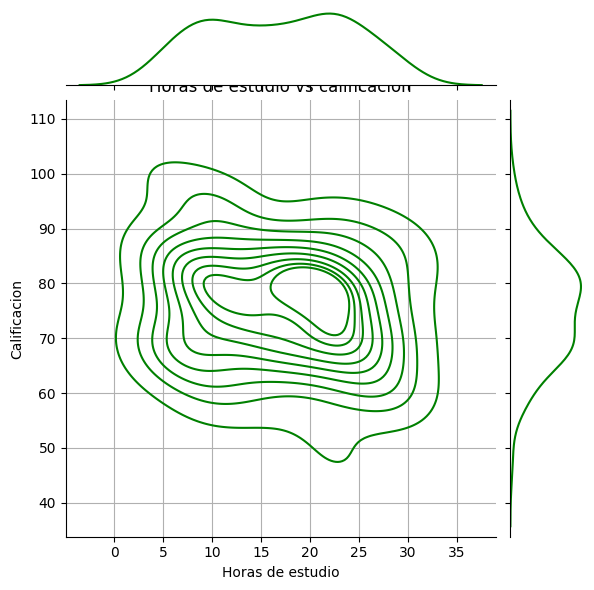

In [ ]:
sns.jointplot(data = df, x = 'Horas de estudio',y = 'Calificacion', kind = 'kde', color = 'green')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificacion')
plt.title('Horas de estudio vs calificacion')
plt.grid(True)
plt.show()

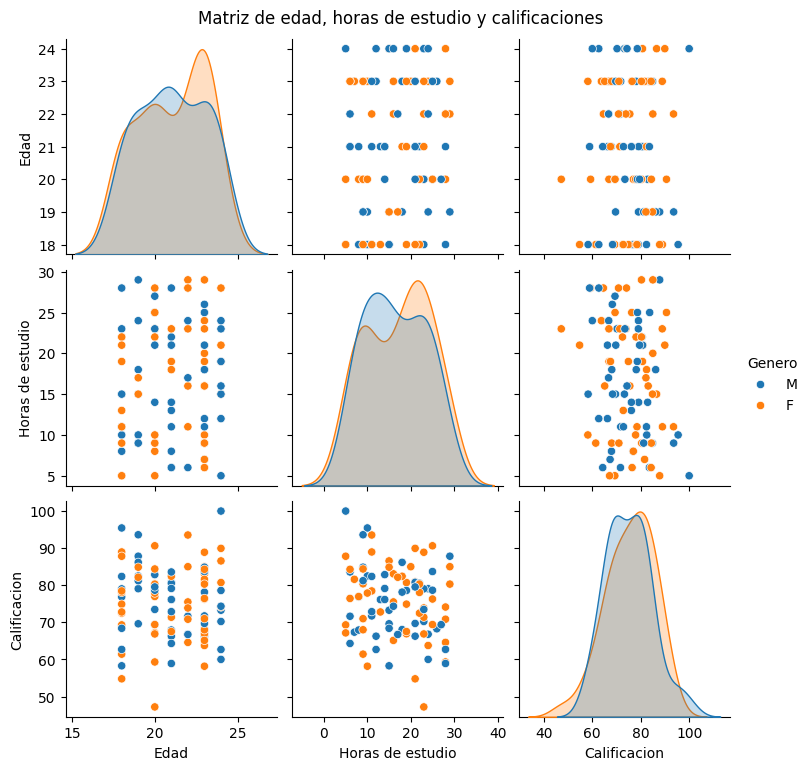

In [ ]:
sns.pairplot(df[['Edad', 'Horas de estudio', 'Calificacion', 'Genero']], hue = 'Genero')
plt.suptitle('Matriz de edad, horas de estudio y calificaciones', y = 1.02)
plt.show()

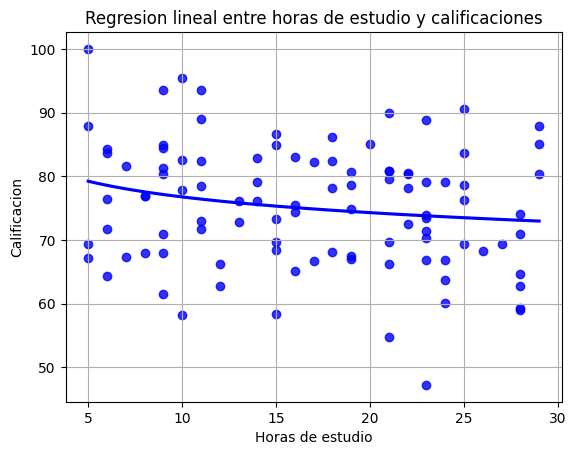

In [8]:
sns.regplot(data = df, x = 'Horas de estudio', y = 'Calificacion', color = 'blue', ci = None, logx = True)
plt.xlabel('Horas de estudio')
plt.ylabel('Calificacion')
plt.title('Regresion lineal entre horas de estudio y calificaciones')
plt.grid(True)
plt.show()

/tmp/ipython-input-11-1267661683.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Genero', y = 'Calificacion', palette = 'viridis')


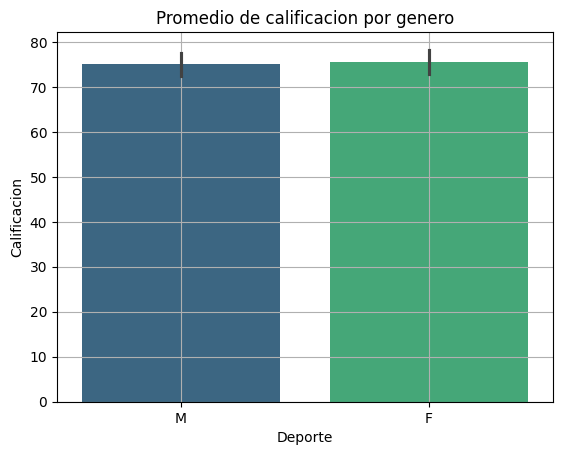

In [11]:
sns.barplot(data = df, x = 'Genero', y = 'Calificacion', palette = 'viridis')
plt.xlabel('Deporte')
plt.ylabel('Calificacion')
plt.title('Promedio de calificacion por genero')
plt.grid(True)
plt.show()

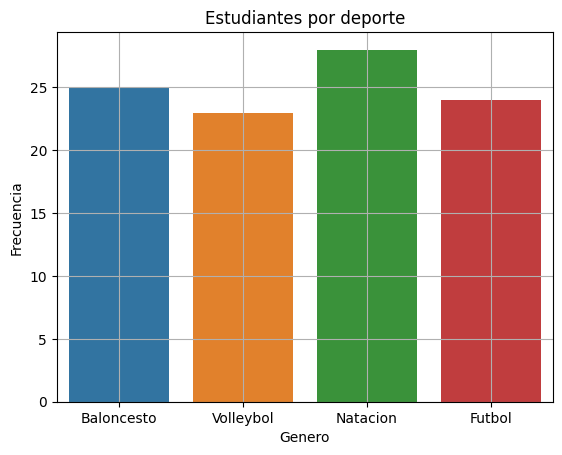

In [16]:
sns.countplot(data = df, x = 'Deporte', hue = 'Deporte')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.title('Estudiantes por deporte')
plt.grid(True)
plt.show()

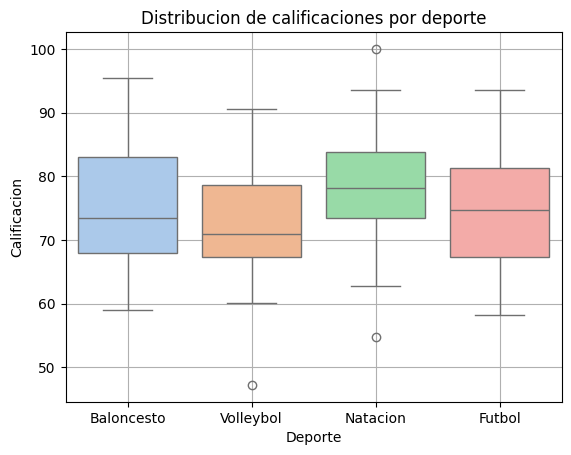

In [19]:
sns.boxplot(data = df, x = 'Deporte', y = 'Calificacion', hue = 'Deporte', palette = 'pastel')
plt.xlabel('Deporte')
plt.ylabel('Calificacion')
plt.title('Distribucion de calificaciones por deporte')
plt.grid(True)
plt.show()

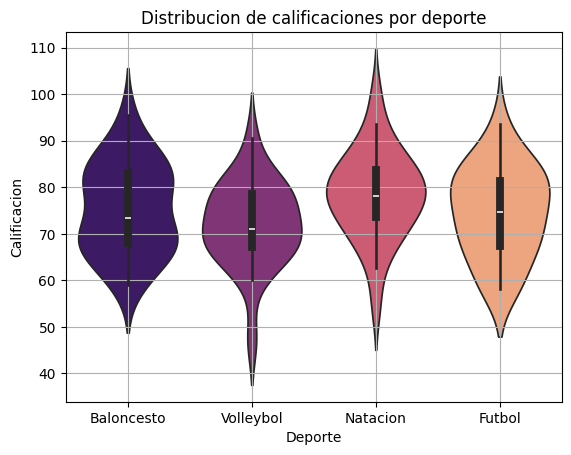

In [21]:
sns.violinplot(data = df, x = 'Deporte', y = 'Calificacion', hue = 'Deporte', palette = 'magma')
plt.xlabel('Deporte')
plt.ylabel('Calificacion')
plt.title('Distribucion de calificaciones por deporte')
plt.grid(True)
plt.show()
#es un boxplot con la distribucion de los datos rodeando el grafico

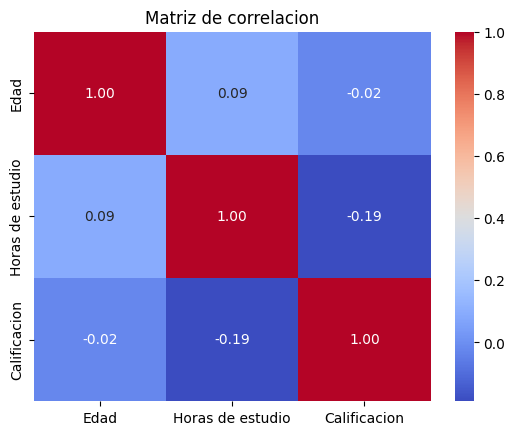

In [25]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Matriz de correlacion')
plt.show()

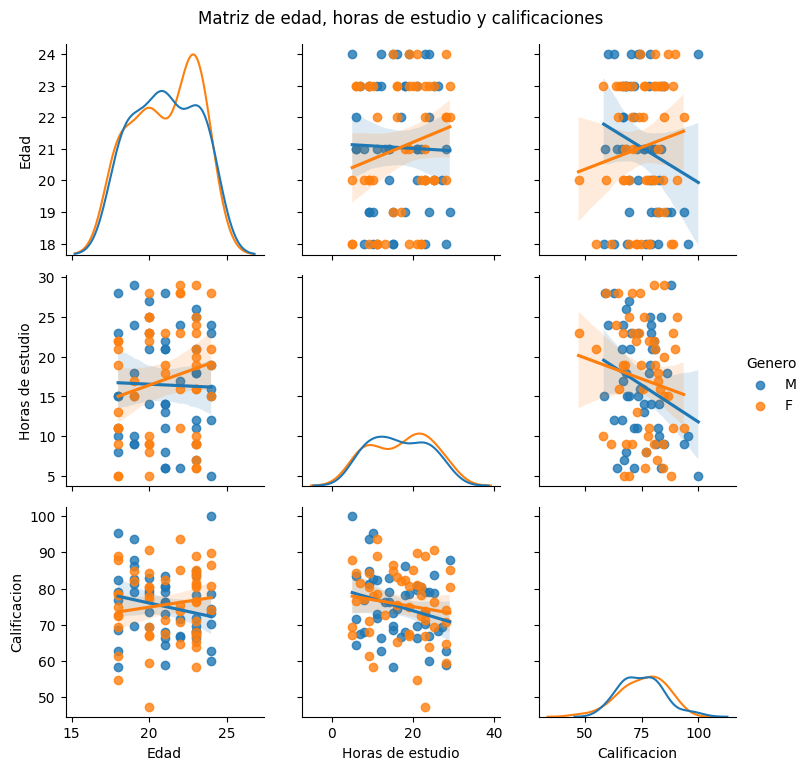

In [28]:
g = sns.PairGrid(data = df, vars = ['Edad', 'Horas de estudio', 'Calificacion'], hue = 'Genero')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.regplot)
g.add_legend(title = 'Genero')
plt.suptitle('Grid personalizado de edad, horas de estudio y calificaciones', y = 1.02)
plt.show()

TypeError: tight_layout() got an unexpected keyword argument 'rec'

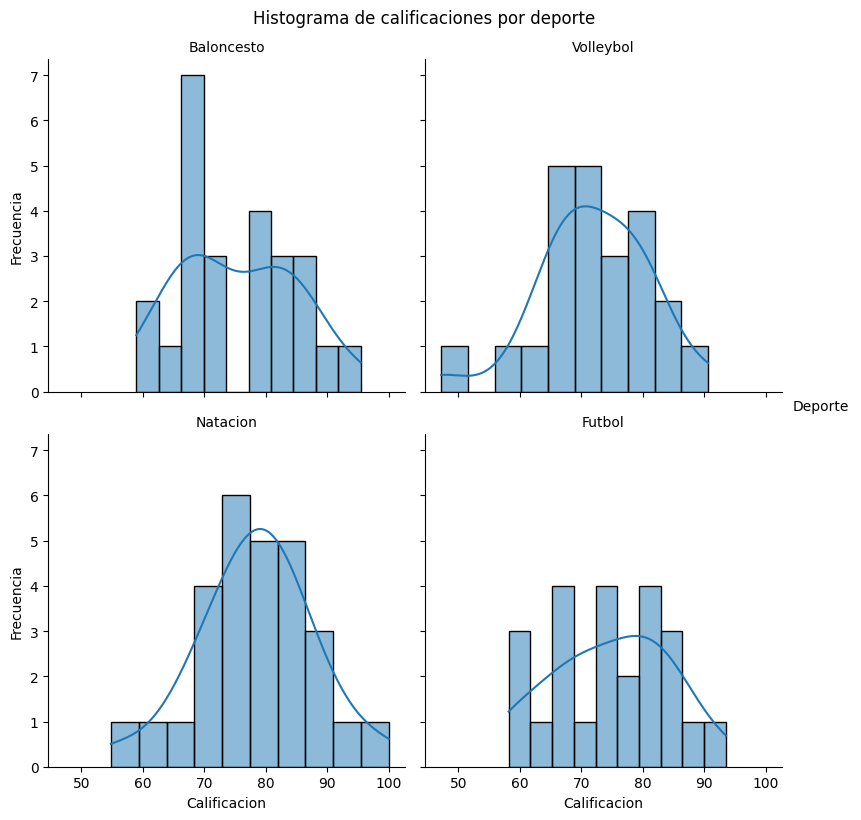

In [40]:
g = sns.FacetGrid(data = df, col = 'Deporte', col_wrap = 2, height = 4)
g.map(sns.histplot, 'Calificacion', kde = True, bins = 10)
g.set_axis_labels('Calificacion', 'Frecuencia')
g.set_titles(template = '{col_name}')
g.add_legend(title = 'Deporte')
plt.suptitle('Histograma de calificaciones por deporte', y = 1.02)
plt.tight_layout(rec = [0, 0.1, 0.98])
plt.show()